In [67]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
import os
import seaborn as sns


In [68]:
data = pd.read_csv('C:\\Users\\Dell\\Desktop\\project m.sc\\WDIData.csv')

In [69]:
first_indicator = 'GDP per capita \(current'
country = 'India'

mask1 = data['Indicator Name'].str.contains(first_indicator) 
mask2 = data['Country Name'].str.contains(country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
c = data[mask1 & mask2]

In [70]:
c = data[mask1 & mask2]
c = c.iloc[1:,]
c = c.transpose()
c = c.iloc[4:,]
df = pd.DataFrame(c)
df.columns = ['India']
df = df.iloc[:-1]


In [71]:
train = df[:len(df)-14]
test = df[len(df)-14:]

In [72]:
j = np.arange(1,15)
df = pd.DataFrame({'x':j, 'y':y_train})
df

,x,y
2006,1,806.753
2007,2,1028.33
2008,3,998.522
2009,4,1101.96
2010,5,1357.56
2011,6,1458.1
2012,7,1443.88
2013,8,1449.61
2014,9,1573.88
2015,10,1605.61


In [77]:
x = np.array(df['x']).reshape((-1, 1))

x

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13]], dtype=int64)

In [80]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x,df['y'])

LinearRegression()

In [81]:
print('intercept:', regr.intercept_)
print('slope:', regr.coef_)


intercept: 868.6283469542857
slope: [93.22078408]


In [87]:
y_pred = regr.predict(x)
y_pred

array([ 868.62834695,  961.84913103, 1055.06991511, 1148.29069919,
       1241.51148327, 1334.73226735, 1427.95305143, 1521.17383551,
       1614.39461959, 1707.61540367, 1800.83618775, 1894.05697183,
       1987.27775591, 2080.49853999])

In [89]:
df['pred'] = y_pred
df

,x,y,pred
2006,0,806.753,868.628347
2007,1,1028.33,961.849131
2008,2,998.522,1055.069915
2009,3,1101.96,1148.290699
2010,4,1357.56,1241.511483
2011,5,1458.1,1334.732267
2012,6,1443.88,1427.953051
2013,7,1449.61,1521.173836
2014,8,1573.88,1614.394620
2015,9,1605.61,1707.615404


In [90]:
print("R squared: {}".format(r2_score(y_true=df['y'],y_pred=y_pred)))


R squared: 0.9645085795773428


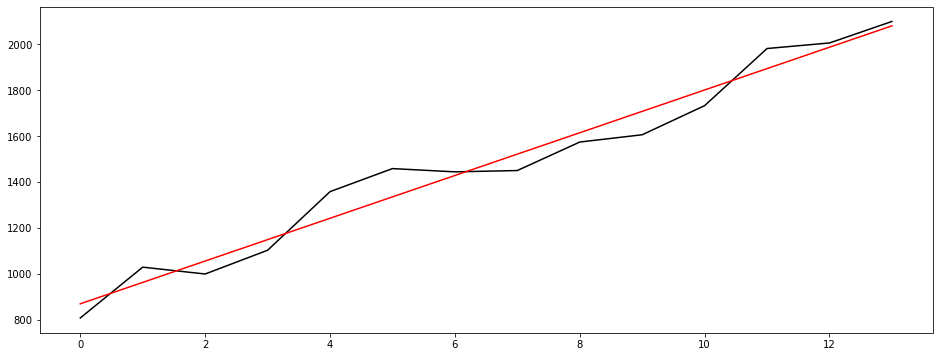

In [92]:
from matplotlib import pyplot
plt.subplots(figsize=(16,6)) 
y = np.arange(1962,2020)
plt.plot(df['x'],df['y'],color = 'black')
plt.plot(df['x'],y_pred,color = 'red')

In [93]:
residuals = df['y']-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -4.06024420434343e-14


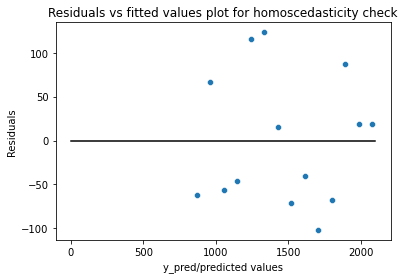

In [95]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([0,2100],[0,0],color='black')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [96]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, x)
lzip(name, test)

[('F statistic', 0.9093238304339301), ('p-value', 0.5444561439267986)]

Since p value is more than 0.05 in Goldfeld Quandt Test, we can't reject it's null hypothesis that error terms are homoscedastic. Good.


DataError: No numeric types to aggregate

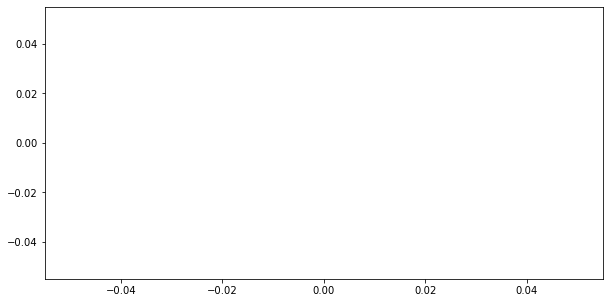

In [98]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([0,2100],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

In [99]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 10)[1])

0.15924587132259554

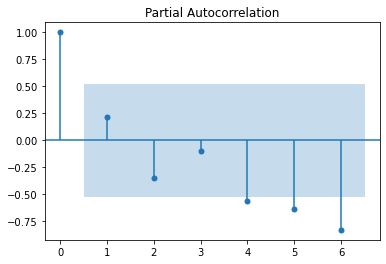

In [106]:
import statsmodels.api as sm

sm.graphics.tsa.plot_pacf(residuals, lags=6)
plt.show()

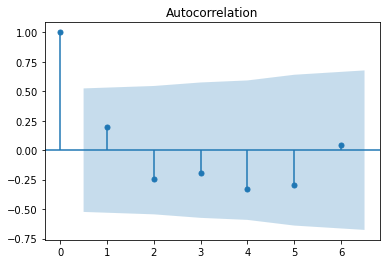

In [108]:
#autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=6)
plt.show()

In [109]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(random_state=0)
dec_tree.fit(x,df['y'])
dec_tree_y_pred = dec_tree.predict(x)
print("Accuracy: {}".format(dec_tree.score(x,df['y'])))
print("R squared: {}".format(r2_score(y_true=df['y'],y_pred=dec_tree_y_pred)))

Accuracy: 1.0
R squared: 1.0


In [110]:
dec_tree_y_pred

array([ 806.7532806, 1028.334771 ,  998.522339 , 1101.96084  ,
       1357.563719 , 1458.103527 , 1443.879529 , 1449.605912 ,
       1573.881492 , 1605.605434 , 1732.564262 , 1981.65105  ,
       2005.863005 , 2099.599048 ])

In [111]:
df['dec_tree'] = dec_tree_y_pred

In [114]:
from sklearn.ensemble import RandomForestRegressor

rf_tree = RandomForestRegressor(random_state=0)
rf_tree.fit(x,df['y'])
rf_tree_y_pred = rf_tree.predict(x)
print("Accuracy: {}".format(rf_tree.score(x,df['y'])))
print("R squared: {}".format(r2_score(y_true=df['y'],y_pred=rf_tree_y_pred)))

Accuracy: 0.9921415834585162
R squared: 0.9921415834585162


In [115]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x,df['y'])
svr_y_pred = svr.predict(x)
print("Accuracy: {}".format(svr.score(x,df['y'])))
print("R squared: {}".format(r2_score(y_true=df['y'],y_pred=svr_y_pred)))

Accuracy: 0.01357881442574227
R squared: 0.01357881442574227
